##Importación de librerias

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import set_config
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats

##Análisis exploratorio

In [ ]:
df = pd.read_csv('utrechthousing.csv')

In [ ]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11.1,5.0,55.5,112.50,10.5,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,13.6,5.0,68.0,112.50,8.0,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,16.6,6.7,111.2,150.75,44.2,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,18.6,6.0,111.6,108.00,39.6,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,19.6,6.0,117.6,108.00,45.6,1,2962,5266,1950,1,526000,610000,0,1


In [ ]:
#Se decide eliminar la columna 'id' al ser irrelevante para el análisis
df = df.drop('id',axis=1)

In [ ]:
#Chequeo de la cantidad de datos, las variables y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zipcode      2000 non-null   int64  
 1   lot-len      2000 non-null   float64
 2   lot-width    2000 non-null   float64
 3   lot-area     2000 non-null   float64
 4   house-area   2000 non-null   float64
 5   garden-size  2000 non-null   float64
 6   balcony      2000 non-null   int64  
 7   x-coor       2000 non-null   int64  
 8   y-coor       2000 non-null   int64  
 9   buildyear    2000 non-null   int64  
 10  bathrooms    2000 non-null   int64  
 11  taxvalue     2000 non-null   int64  
 12  retailvalue  2000 non-null   int64  
 13  energy-eff   2000 non-null   int64  
 14  monument     2000 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 234.5 KB


In [ ]:
#Verificación de nulos
df.isna().sum()

,0
zipcode,0
lot-len,0
lot-width,0
lot-area,0
house-area,0
garden-size,0
balcony,0
x-coor,0
y-coor,0
buildyear,0


No se encontraron nulos en este dataset

Text(0, 0.5, 'Cantidad de casas')

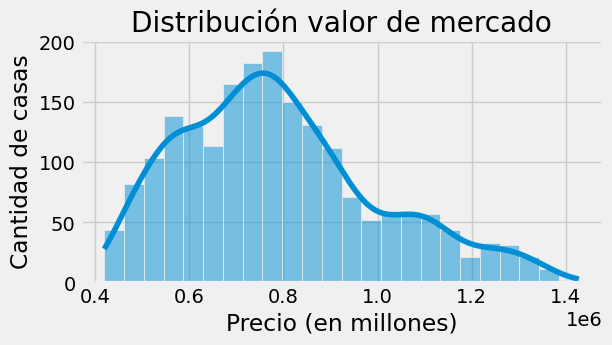

In [ ]:
# Distribución variable respuesta
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
sns.histplot(data=df, x='retailvalue', kde=True, ax=ax)
ax.set_title('Distribución valor de mercado')
ax.set_xlabel('Precio (en millones)')
ax.set_ylabel('Cantidad de casas')

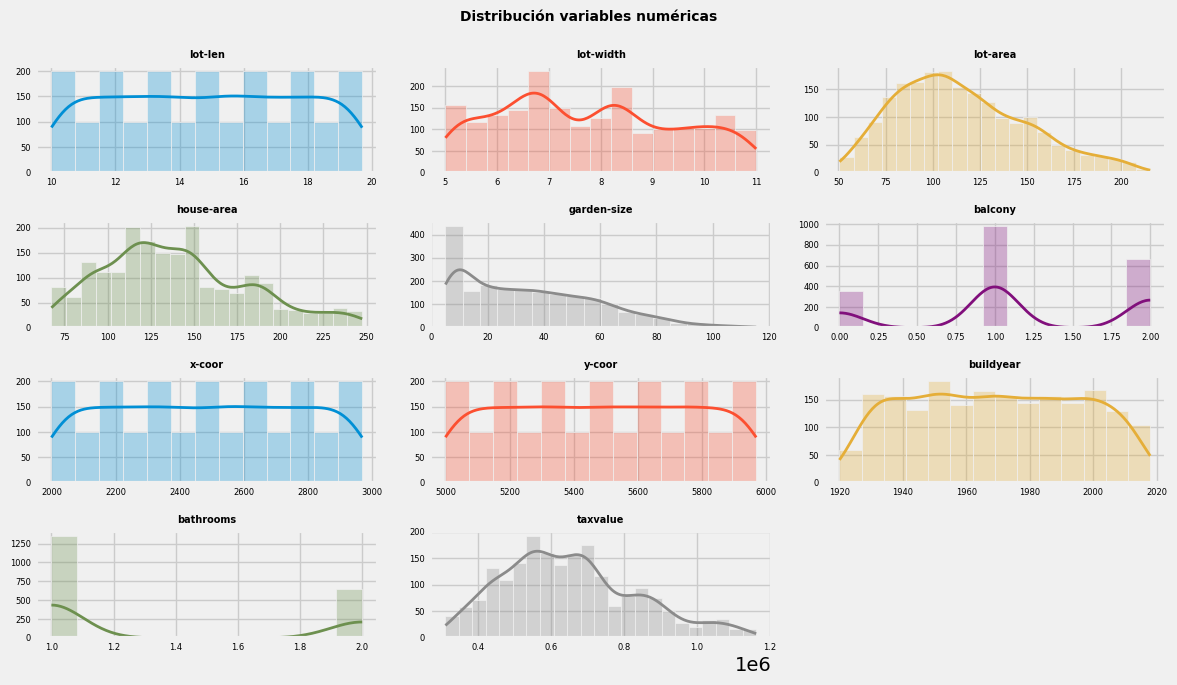

In [ ]:
# Gráfico de distribución para cada variable cuantitativa

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = df.drop(['retailvalue','energy-eff','monument','zipcode'],axis=1)

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

axes[-1].set_visible(False)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

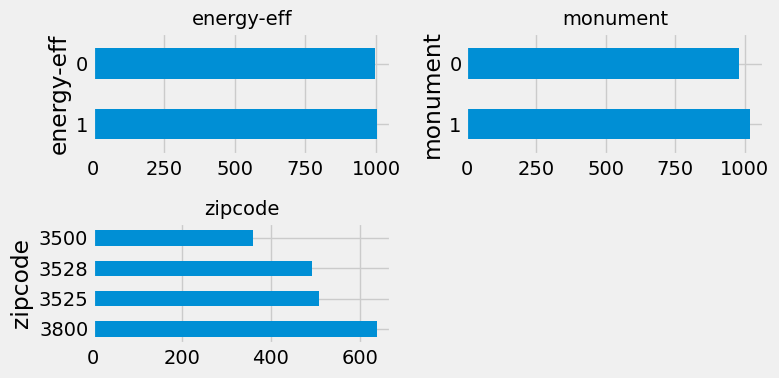

In [ ]:
# Gráfico para cada variable cualitativa

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))
axes = axes.flat
columnas_cat= df[['energy-eff','monument','zipcode']]

for i, colum in enumerate(columnas_cat):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

axes[-1].set_visible(False)

fig.tight_layout()

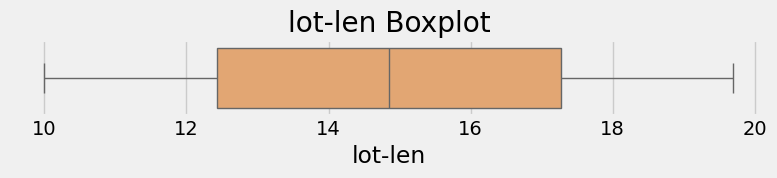


Summary Statistics for lot-len:
 count    2000.000000
mean       14.848500
std         2.883188
min        10.000000
25%        12.425000
50%        14.850000
75%        17.275000
max        19.700000
Name: lot-len, dtype: float64


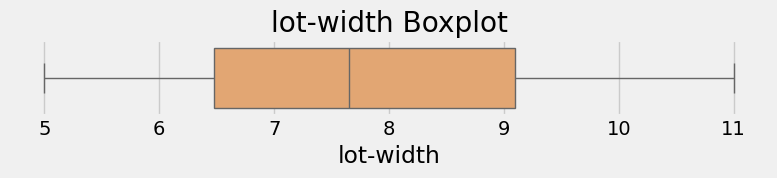


Summary Statistics for lot-width:
 count    2000.00000
mean        7.75520
std         1.69576
min         5.00000
25%         6.47500
50%         7.65000
75%         9.10000
max        11.00000
Name: lot-width, dtype: float64


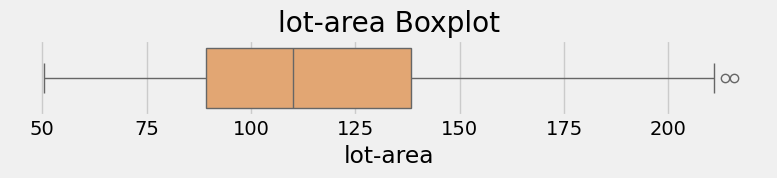


Summary Statistics for lot-area:
 count    2000.000000
mean      115.236600
std        34.370459
min        50.500000
25%        89.100000
50%       109.950000
75%       138.325000
max       215.600000
Name: lot-area, dtype: float64


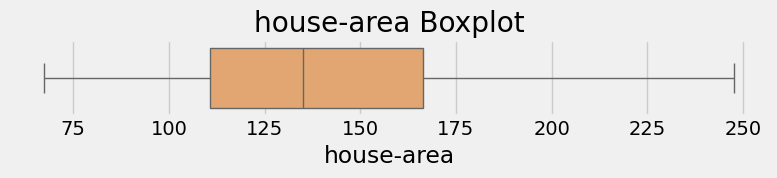


Summary Statistics for house-area:
 count    2000.000000
mean      139.884750
std        41.745307
min        67.500000
25%       110.700000
50%       135.000000
75%       166.500000
max       247.500000
Name: house-area, dtype: float64


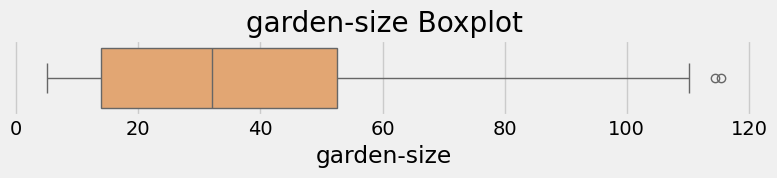


Summary Statistics for garden-size:
 count    2000.00000
mean       35.45365
std        23.86576
min         5.00000
25%        13.87500
50%        32.00000
75%        52.55000
max       115.50000
Name: garden-size, dtype: float64


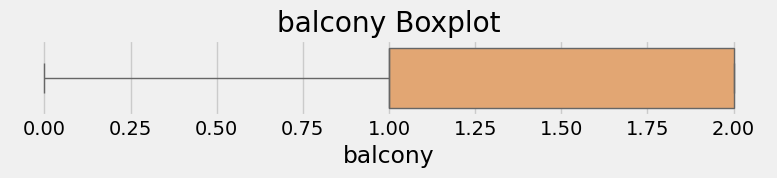


Summary Statistics for balcony:
 count    2000.000000
mean        1.152500
std         0.698203
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: balcony, dtype: float64


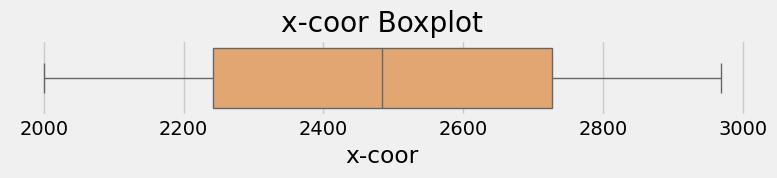


Summary Statistics for x-coor:
 count    2000.000000
mean     2484.360500
std       288.399892
min      2000.000000
25%      2242.250000
50%      2484.500000
75%      2726.750000
max      2969.000000
Name: x-coor, dtype: float64


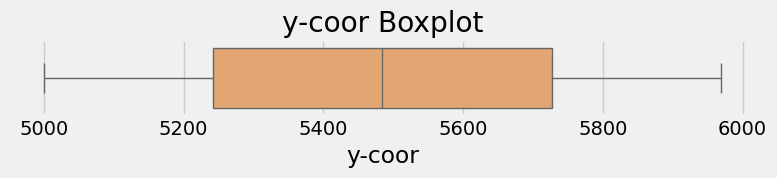


Summary Statistics for y-coor:
 count    2000.000000
mean     5484.435000
std       288.538538
min      5000.000000
25%      5242.250000
50%      5484.500000
75%      5726.750000
max      5969.000000
Name: y-coor, dtype: float64


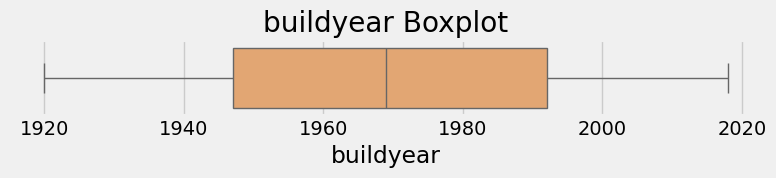


Summary Statistics for buildyear:
 count    2000.000000
mean     1969.044500
std        26.358109
min      1920.000000
25%      1947.000000
50%      1969.000000
75%      1992.000000
max      2018.000000
Name: buildyear, dtype: float64


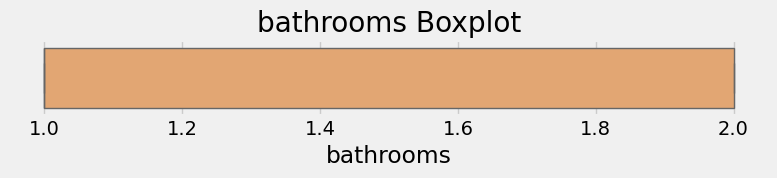


Summary Statistics for bathrooms:
 count    2000.000000
mean        1.327000
std         0.469235
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: bathrooms, dtype: float64


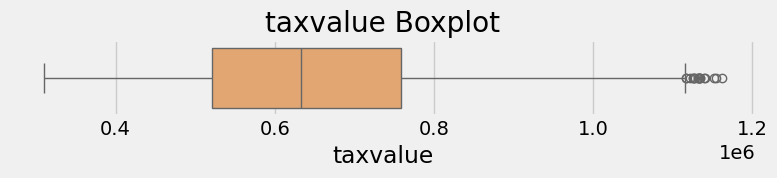


Summary Statistics for taxvalue:
 count    2.000000e+03
mean     6.517150e+05
std      1.829273e+05
min      3.100000e+05
25%      5.210000e+05
50%      6.330000e+05
75%      7.592500e+05
max      1.162000e+06
Name: taxvalue, dtype: float64


In [ ]:
# Outliers
def univariate_analysis(data, column, title):
    plt.figure(figsize=(8, 2))

    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columnas_numeric = df.drop(['retailvalue','energy-eff','monument','zipcode'],axis=1)

for column in columnas_numeric:
    univariate_analysis(df, column, column.replace('_', ' '))

Se intentó hacer una eliminación de outliers con el metodo de Hampel, pero esto dió resultados más desfavorables en el caso de los residuos. Entonces, ya que los outliers siguen siendo valores no improbables, se decidió no eliminar los datos que se ven como outliers en los gráficos

##Estandarización

In [ ]:
# Reparto de datos en train y test

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('retailvalue', axis = 'columns'),#X
                                        df['retailvalue'].values.reshape(-1,1),#Y
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Identificación de columnas cuantitativas y categóricas

numeric_cols = X_train.drop(['energy-eff','monument','zipcode'],axis=1).columns.to_list()
cat_cols = X_train[['energy-eff','monument','zipcode']].columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                    ],
                    remainder='passthrough'
                )

No se realizó una transformación en las variables categóricas porque estas ya vinieron en el dataset en formato de categóricas numéricas

In [ ]:
# Se aprenden y aplican las transformaciones de preprocesado

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Se convierte el output train en dataframe y se añade el nombre de las columnas

labels = np.concatenate([numeric_cols, cat_cols])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.head()

,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,energy-eff,monument,zipcode
0,0.771587,1.763808,1.984876,1.287011,0.805280,1.217889,0.780080,-0.253325,-0.182051,-0.687965,1.474504,3800.0,0.0,1.0
1,0.425845,-0.651207,-0.242363,-1.200868,-0.070337,-0.219148,0.441344,0.946662,0.872771,-0.687965,-1.134043,3500.0,1.0,0.0
2,-1.614029,-0.827916,-1.461972,-1.298220,-1.218275,-1.656185,-1.615268,-0.739526,-0.634118,-0.687965,-1.402570,3528.0,1.0,0.0
3,0.737013,0.232335,0.669440,1.038223,0.214552,1.217889,0.745515,0.967351,0.910443,1.453561,1.047053,3500.0,1.0,0.0
4,-1.648603,1.351488,-0.396266,-0.097548,-1.063262,1.217889,-1.639463,-0.087809,-0.219723,-0.687965,-0.147618,3528.0,0.0,0.0


In [ ]:
# Se convierte el output test en dataframe y se añade el nombre de las columnas

labels = np.concatenate([numeric_cols, cat_cols])
datos_test_prep = preprocessor.transform(X_test)
datos_test_prep = pd.DataFrame(datos_test_prep, columns=labels)
datos_test_prep.head()

,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,energy-eff,monument,zipcode
0,-0.127341,-1.122430,-0.887013,-0.833095,-0.145749,1.217889,-0.111694,-0.953317,-1.086184,-0.687965,-0.892917,3528.0,0.0,1.0
1,-1.268288,-0.179985,-0.921859,-0.941263,-1.172190,-1.656185,-1.283445,1.315623,1.174149,-0.687965,-0.997040,3525.0,0.0,0.0
2,0.425845,-0.945721,-0.477573,-0.703292,-0.179266,-0.219148,0.441344,-0.974006,-1.010840,-0.687965,-0.712073,3800.0,0.0,1.0
3,0.979032,0.409043,0.988862,1.200476,0.524579,1.217889,0.977100,1.615619,1.437854,1.453561,1.244338,3500.0,1.0,0.0
4,0.598716,0.762460,1.009189,0.551464,1.383438,1.217889,0.586517,0.060465,0.043982,-0.687965,0.657963,3800.0,0.0,1.0


##Matriz de correlación

Realizamos la matriz de correlación para poder ver la ralación entre las variables

In [ ]:
# Se convierte el set y_train a data frame para que pueda ser utilizado en la matriz

y_train= y_train.flatten()
y_train = pd.DataFrame(y_train, columns=['retailvalue'])

y_train

,retailvalue
0,1124000
1,515000
2,525000
3,939000
4,795000
...,...
1595,777000
1596,679000
1597,1113000
1598,967000


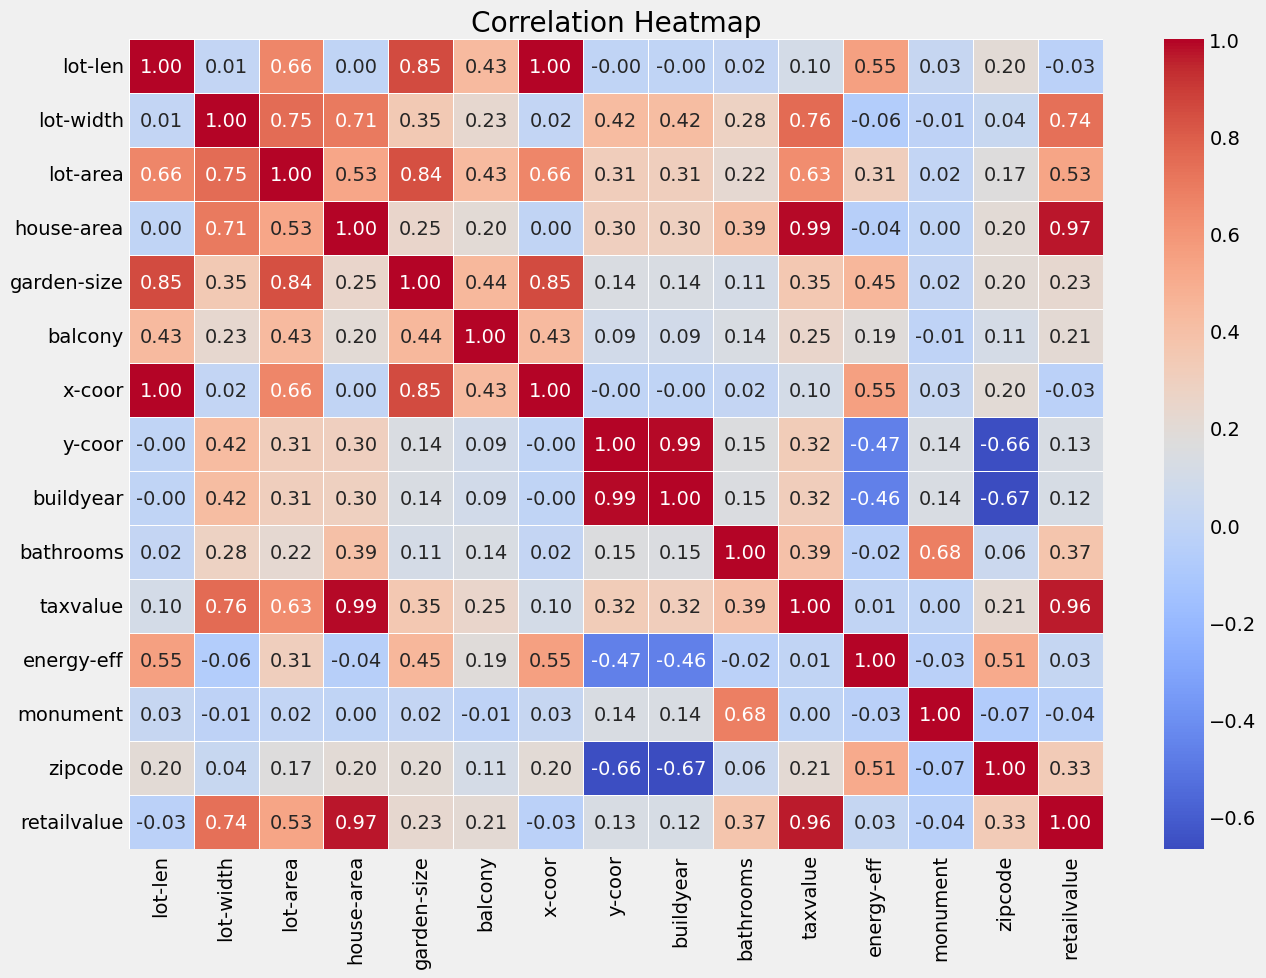

In [ ]:
# Matriz de correlacion

corr_matrix = pd.concat([datos_train_prep, y_train], axis=1).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##Modelado

###Primer acercamiento

In [ ]:
datos_train_prep = sm.add_constant(datos_train_prep, prepend=True).rename(columns={'const':'intercept'})
modelo  = sm.OLS(endog=y_train, exog=datos_train_prep)
modelo_res = modelo.fit()
print(modelo_res.summary())

                            OLS Regression Results                            
Dep. Variable:            retailvalue   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:10:26   Log-Likelihood:                -18135.
No. Observations:                1600   AIC:                         3.630e+04
Df Residuals:                    1585   BIC:                         3.638e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    8.859e+05   2.08e+04     42.574      

###Selección de variables

Se hicieron diferentes pruebas con distintos criterios para elegir cuales podían ser las variables que definieran mejor la precisión del modelo

In [ ]:
def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:


    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)

####AIC

In [ ]:
# Selección de variables hacia forward
predictores = forward_selection(
    X            = datos_train_prep,
    y            = y_train,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['intercept'] | aic: 43764.619
variables: ['intercept', 'house-area'] | aic: 39271.383
variables: ['intercept', 'house-area', 'y-coor'] | aic: 38158.366
variables: ['intercept', 'house-area', 'y-coor', 'lot-width'] | aic: 36627.266
variables: ['intercept', 'house-area', 'y-coor', 'lot-width', 'x-coor'] | aic: 36475.623
variables: ['intercept', 'house-area', 'y-coor', 'lot-width', 'x-coor', 'balcony'] | aic: 36398.823
variables: ['intercept', 'house-area', 'y-coor', 'lot-width', 'x-coor', 'balcony', 'lot-area'] | aic: 36363.811
variables: ['intercept', 'house-area', 'y-coor', 'lot-width', 'x-coor', 'balcony', 'lot-area', 'garden-size'] | aic: 36331.627
variables: ['intercept', 'house-area', 'y-coor', 'lot-width', 'x-coor', 'balcony', 'lot-area', 'garden-size', 'energy-eff'] | aic: 36311.461
variables: ['intercept', 'house-area', 'y-coor', 'lot-width', 'x-coor', 'balcony', 'lot-area', 'garden-size', 'energy-eff', 'monument'] | aic: 36302.457
variables: ['intercept', 'house-are

['balcony',
 'bathrooms',
 'buildyear',
 'energy-eff',
 'garden-size',
 'house-area',
 'intercept',
 'lot-area',
 'lot-width',
 'monument',
 'x-coor',
 'y-coor',
 'zipcode']

####rsquared_adj

In [ ]:
# Selección de variables hacia forward
predictores = forward_selection(
    X            = datos_train_prep,
    y            = y_train,
    criterio     = 'rsquared_adj',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['energy-eff'] | rsquared_adj: 0.932
variables: ['energy-eff', 'house-area'] | rsquared_adj: 0.996
variables: ['energy-eff', 'house-area', 'y-coor'] | rsquared_adj: 0.997
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width'] | rsquared_adj: 0.998
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width', 'lot-len'] | rsquared_adj: 0.999
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width', 'lot-len', 'balcony'] | rsquared_adj: 0.999
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width', 'lot-len', 'balcony', 'lot-area'] | rsquared_adj: 0.999
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width', 'lot-len', 'balcony', 'lot-area', 'garden-size'] | rsquared_adj: 0.999
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width', 'lot-len', 'balcony', 'lot-area', 'garden-size', 'monument'] | rsquared_adj: 0.999
variables: ['energy-eff', 'house-area', 'y-coor', 'lot-width', 'lot-len', 'balcony', 'lot-area', 'garden-size', 'monument', 'bathro

['balcony',
 'bathrooms',
 'buildyear',
 'energy-eff',
 'garden-size',
 'house-area',
 'lot-area',
 'lot-len',
 'lot-width',
 'monument',
 'y-coor']

####SequentialFeatureSelector

In [ ]:
# Selección de predictores con sklearn SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
sfs = SequentialFeatureSelector(
    LR,
    n_features_to_select = 'auto',
    direction            = 'forward',
    scoring              = 'r2',
    cv                   = 5
)
sfs.fit(datos_train_prep, y_train)
lista_final = sfs.get_feature_names_out().tolist()
lista_final

['lot-width',
 'lot-area',
 'house-area',
 'garden-size',
 'balcony',
 'x-coor',
 'y-coor']

###Modelos

####Modelo usando SequentialFeatureSelector

In [ ]:
modelo_final  = sm.OLS(endog=y_train, exog=datos_train_prep[['lot-width',
                                                            'lot-area',
                                                            'house-area',
                                                            'garden-size',
                                                            'balcony',
                                                            'x-coor',
                                                            'y-coor']])
modelo_final_res = modelo_final.fit()
print(modelo_final_res.summary())

                                 OLS Regression Results                                
Dep. Variable:            retailvalue   R-squared (uncentered):                   0.066
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              16.13
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                    1.32e-20
Time:                        00:10:30   Log-Likelihood:                         -23991.
No. Observations:                1600   AIC:                                  4.800e+04
Df Residuals:                    1593   BIC:                                  4.803e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Luego de obtener estos resultados se decidió no tener en cuenta este criterio

####Modelo Final

In [ ]:
modelo_final  = sm.OLS(endog=y_train, exog=datos_train_prep[['intercept',
                                                              'balcony',
                                                              'energy-eff',
                                                              'garden-size',
                                                              'house-area',
                                                              'lot-area',
                                                              'lot-width',
                                                              'x-coor',
                                                              'y-coor',
                                                              ]])
modelo_final_res = modelo_final.fit()
print(modelo_final_res.summary())

                            OLS Regression Results                            
Dep. Variable:            retailvalue   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.098e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:14:34   Log-Likelihood:                -18147.
No. Observations:                1600   AIC:                         3.631e+04
Df Residuals:                    1591   BIC:                         3.636e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    8.847e+05   2.09e+04     42.375      

Se probaron distintas combinaciones de variables para poder mejorar la predicción. Principalmente se eliminaron las variables irrelevantes, luego se terminó eligiendo estas variables como definitivas porque se consideraron lo suficientemente relevantes para la predicción y para evitar que el modelo caiga en un caso de overfiting.

##Residuos

In [ ]:
# Residuos del modelo
residuos = modelo_final_res.resid

# prediciones de entrenamiento
prediccion_train = modelo_final_res.predict(datos_train_prep[['intercept',
                                                              'balcony',
                                                              'energy-eff',
                                                              'garden-size',
                                                              'house-area',
                                                              'lot-area',
                                                              'lot-width',
                                                              'x-coor',
                                                              'y-coor',
                                                              ]])

####Gráficos

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


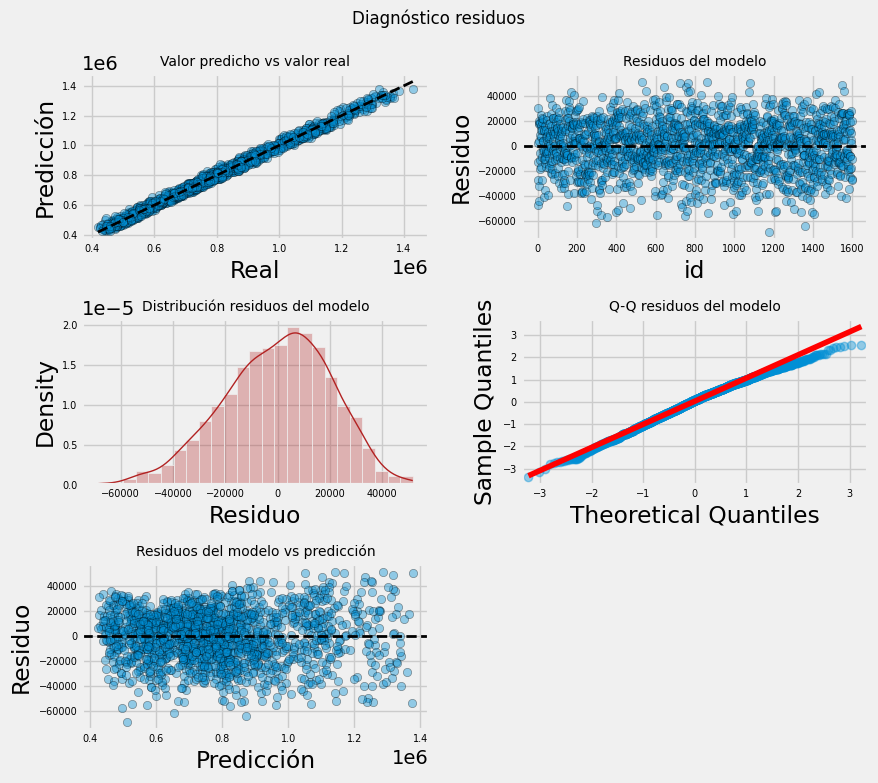

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);

####Tests

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")

Test Shapiro-Wilk: estadístico = 0.9928400579000136, p-value = 5.204558009413835e-07
Test D'Agostino's K-squared: estadístico = 25.03729049293251, p-value = 3.6578125744760855e-06


In [ ]:
# Prueba de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, datos_train_prep[['intercept',
                                                                                'balcony',
                                                                                'energy-eff',
                                                                                'garden-size',
                                                                                'house-area',
                                                                                'lot-area',
                                                                                'lot-width',
                                                                                'x-coor',
                                                                                'y-coor',
                                                                                'zipcode']])
print(f"Estadístico= {fvalue}, p-value = {f_p_value}")

Estadístico= 17.82238831610211, p-value = 1.9613139449149228e-28


Se intentó acercar los errores a una distribución normal lo más que se pudiera.
En los gráficos de los residuos pareciera que los errores se distribuyen normalmente, pero los tests realizados posteriormente indican con mayor fiabilidad que estos datos en realidad no siguen una distribución normal.

####Error (rmse)

In [ ]:
# Prediciones del conjunto de test
datos_test_prep = sm.add_constant(datos_test_prep, prepend=True).rename(columns={'const':'intercept'})

# Crear un DataFrame con las mismas columnas que el modelo
columnas_modelo = modelo_res.model.exog_names  # Nombres esperados por el modelo
datos_test_prep = datos_test_prep.reindex(columns=columnas_modelo, fill_value=0)  # Rellenar faltantes con 0

modelo_final_res.predict(datos_test_prep[['intercept',
                                           'balcony',
                                           'energy-eff',
                                           'garden-size',
                                           'house-area',
                                           'lot-area',
                                           'lot-width',
                                           'x-coor',
                                           'y-coor',
                                           ]])

predicciones = modelo_final_res.get_prediction(exog = datos_test_prep[['intercept',
                                                              'balcony',
                                                              'energy-eff',
                                                              'garden-size',
                                                              'house-area',
                                                              'lot-area',
                                                              'lot-width',
                                                              'x-coor',
                                                              'y-coor',
                                                              ]]).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,638224.424898,1419.925425,635439.303431,641009.546365,598022.065613,6.784268e+05
1,539445.707766,1537.783960,536429.411949,542462.003583,499226.672088,5.796647e+05
2,653193.635914,1076.713414,651081.709759,655305.562070,613032.298504,6.933550e+05
3,956497.030499,1614.156667,953330.932965,959663.128032,916266.482850,9.967276e+05
4,913894.795222,1433.966200,911082.133389,916707.457055,873690.518621,9.540991e+05
...,...,...,...,...,...,...
395,987487.050295,1548.396787,984449.937883,990524.162707,947266.448083,1.027708e+06
396,790017.657416,1410.105276,787251.797740,792783.517092,749816.627949,8.302187e+05
397,629498.988348,1692.905689,626178.428060,632819.548635,589255.990061,6.697420e+05
398,780454.706435,1848.338735,776829.271044,784080.141827,740185.405817,8.207240e+05


In [ ]:
# Error de test del modelo
# ==============================================================================
error = rmse(y_test.flatten(), predicciones['mean'])
print(f"El error (rmse) de test es: {error}") #El margen de error

El error (rmse) de test es: 21364.168553092615


Podemos decir que podemos predecir el precio de una casa con un error de 21364

##Conclusión final

Se realizaron todos los pasos necesarios para crear el modelo de predicción. Se realizó la exploración de datos, la limpieza de estos y el analis de outliers. Se analizaron criterios para seleccionar las variables que se tendrian en cuenta en el modelo. Y finalmente se realizó el modelo.

Si bien los residuos no arrojaron resultados muy favorables, se pudo acercar el modelo a tener un R-squared de 0.991, lo cual es un resultado excelente.